In [ ]:
from google.colab import drive
drive.mount('/content/my-drive')

Mounted at /content/my-drive


In [ ]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import os

Đang load dữ liệu từ file combined_data.mat...

Shape của dữ liệu đã load:
X_train_loaded shape: (11956, 750)
hr_raw_train_loaded shape: (11956,)
X_test_loaded shape: (2990, 750)
hr_raw_test_loaded shape: (2990,)
X_total_loaded shape: (14946, 750)
hr_raw_total_loaded shape: (14946,)


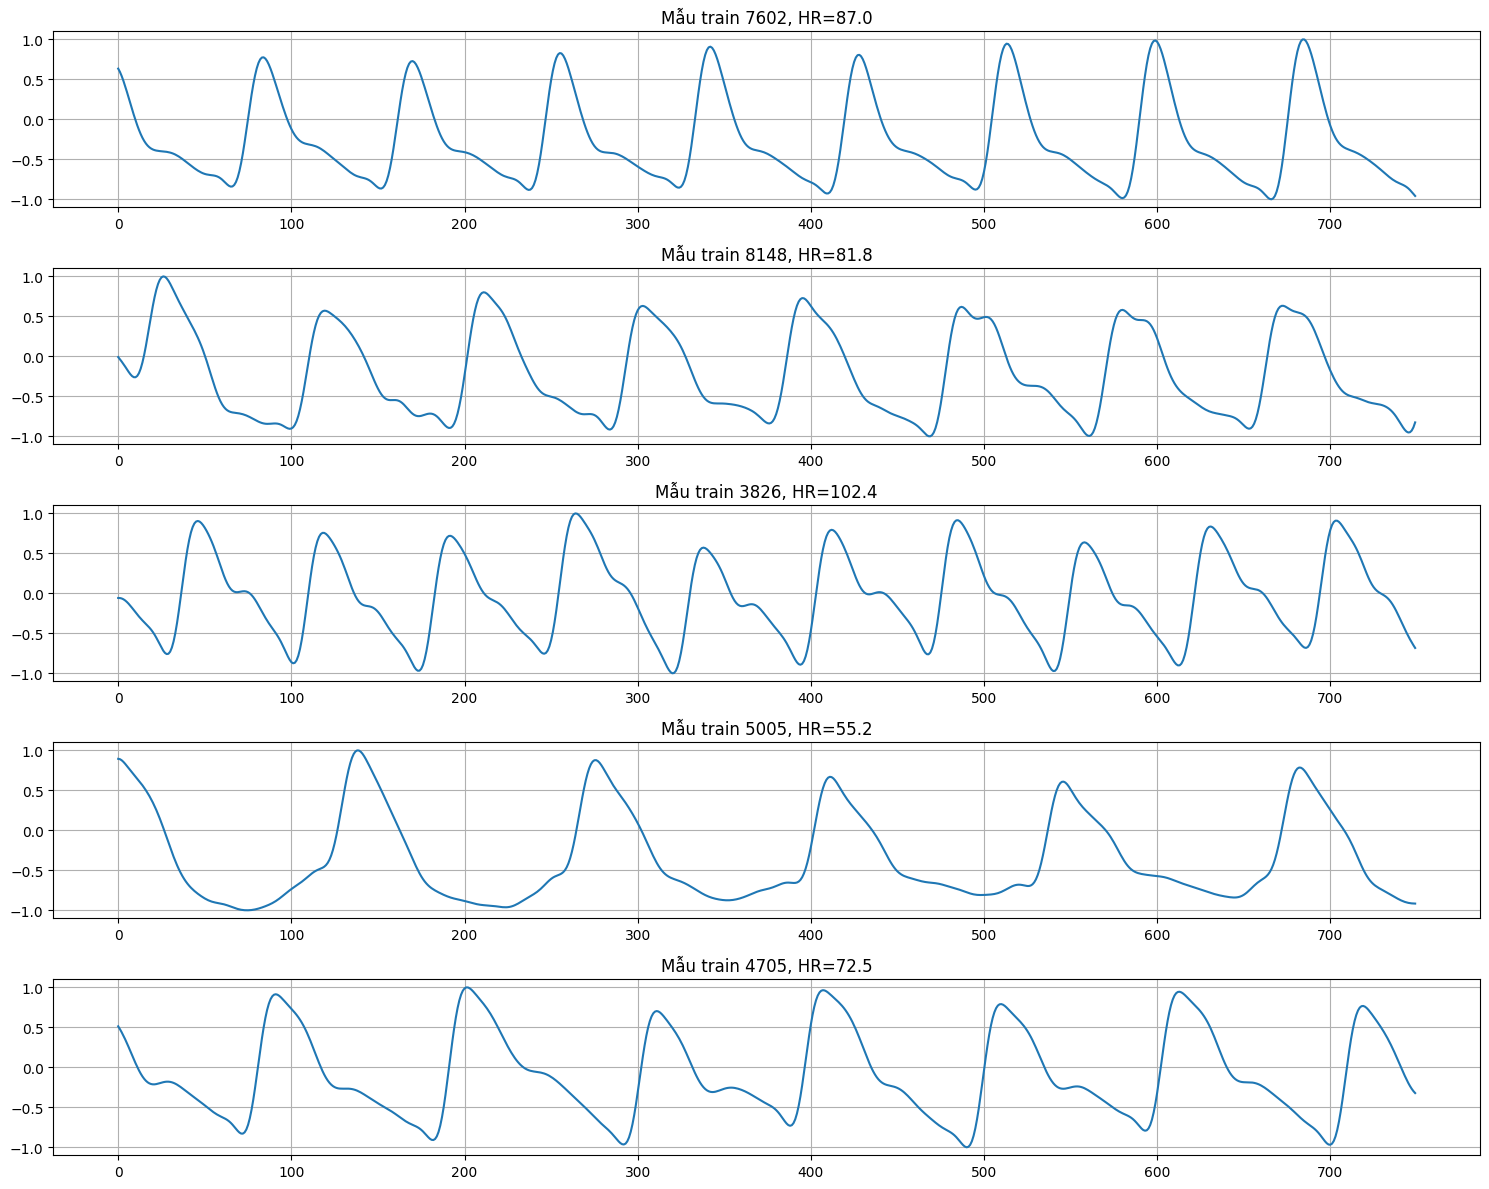

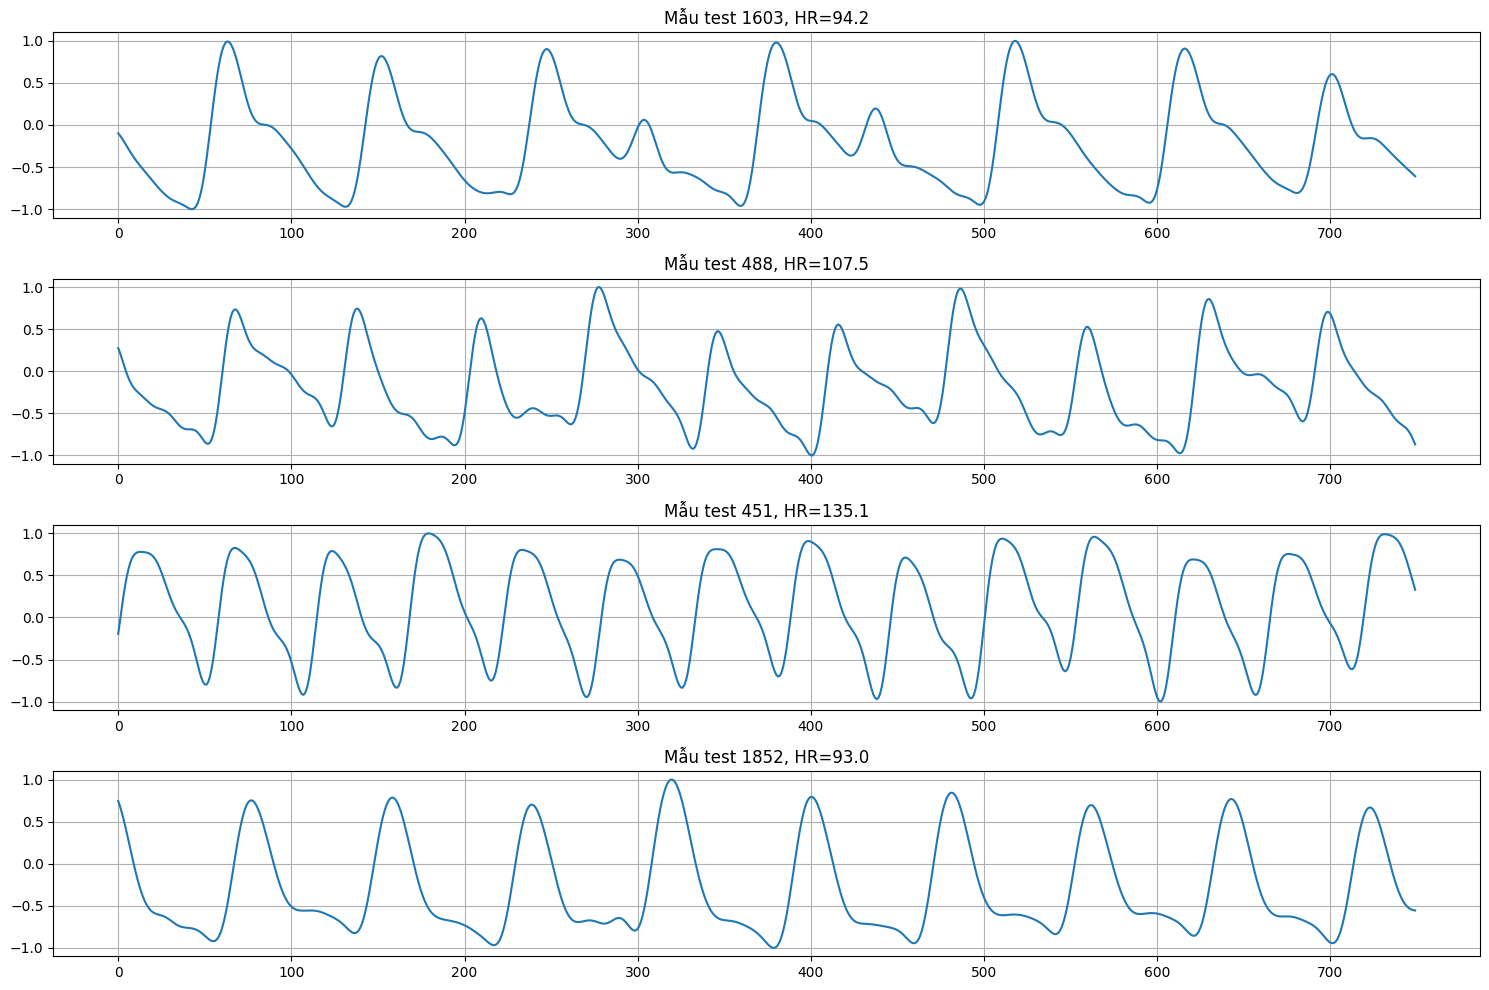

In [ ]:
print("Đang load dữ liệu từ file combined_data.mat...")
loaded_data = loadmat('/content/my-drive/MyDrive/Iot-Mid/combined_data.mat')

# Trích xuất dữ liệu
X_train_loaded = loaded_data['X_train_norm']
X_test_loaded = loaded_data['X_test_norm']
hr_raw_train_loaded = loaded_data['hr_raw_train'].flatten()  # Flatten để chuyển từ (1, n) thành (n,)
hr_raw_test_loaded = loaded_data['hr_raw_test'].flatten()    # Flatten để chuyển từ (1, n) thành (n,)
X_total_loaded = loaded_data['X_total_norm']
hr_raw_total_loaded = loaded_data['hr_raw_total'].flatten()  # Flatten để chuyển từ (1, n) thành (n,)

# Kiểm tra kích thước dữ liệu đã load
print("\nShape của dữ liệu đã load:")
print(f"X_train_loaded shape: {X_train_loaded.shape}")
print(f"hr_raw_train_loaded shape: {hr_raw_train_loaded.shape}")
print(f"X_test_loaded shape: {X_test_loaded.shape}")
print(f"hr_raw_test_loaded shape: {hr_raw_test_loaded.shape}")
print(f"X_total_loaded shape: {X_total_loaded.shape}")
print(f"hr_raw_total_loaded shape: {hr_raw_total_loaded.shape}")

# Vẽ một vài mẫu từ dữ liệu đã load
plt.figure(figsize=(15, 12))

# Vẽ 5 mẫu tín hiệu từ tập train
for i in range(5):
    idx = np.random.randint(0, X_train_loaded.shape[0])
    plt.subplot(5, 1, i+1)
    plt.plot(X_train_loaded[idx])
    plt.title(f'Mẫu train {idx}, HR={hr_raw_train_loaded[idx]:.1f}')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Vẽ một vài mẫu từ tập test
plt.figure(figsize=(15, 10))

# Vẽ 4 mẫu tín hiệu từ tập test
for i in range(4):
    idx = np.random.randint(0, X_test_loaded.shape[0])
    plt.subplot(4, 1, i+1)
    plt.plot(X_test_loaded[idx])
    plt.title(f'Mẫu test {idx}, HR={hr_raw_test_loaded[idx]:.1f}')
    plt.grid(True)

plt.tight_layout()
plt.show()



Shape của dữ liệu đã load:
X_train_loaded shape: (11956, 750)
hr_raw_train_loaded shape: (11956,)
X_test_loaded shape: (2990, 750)
hr_raw_test_loaded shape: (2990,)
X_total_loaded shape: (14946, 750)
hr_raw_total_loaded shape: (14946,)

Thống kê HR raw total:
Min: 50.23, Max: 143.53
Mean: 86.85, Std: 17.46
Mean ± Std: 86.85 ± 17.46


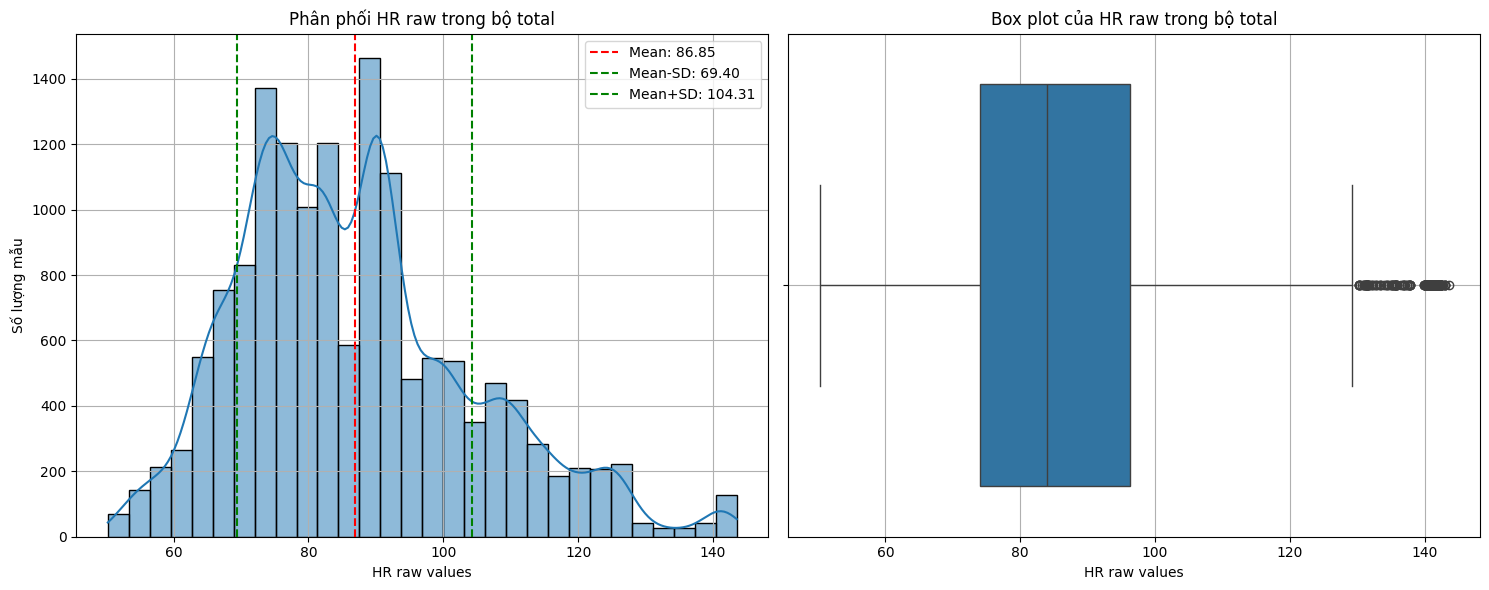


Lọc dữ liệu trong khoảng HR raw: [51.94, 121.77]

Thống kê HR raw total sau khi chuẩn hóa:
Min: 0.0002, Max: 0.9997
Mean: 0.4711, Std: 0.2128


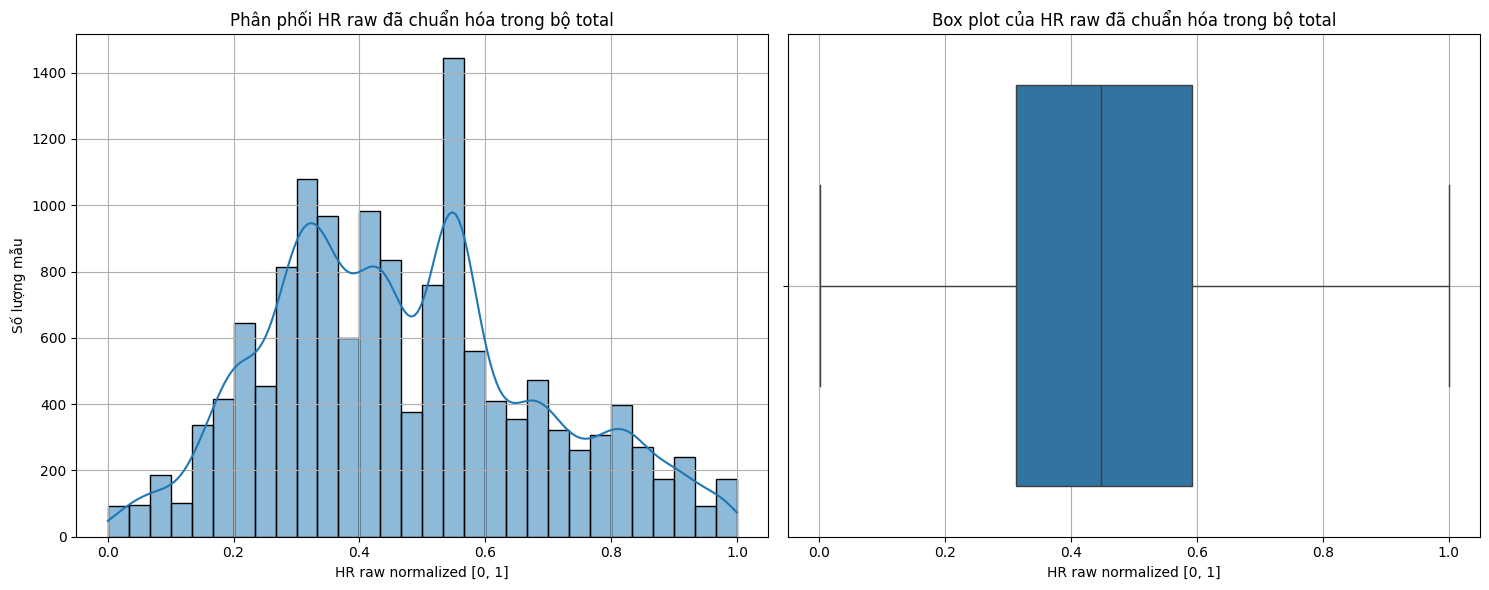

Số mẫu train ban đầu: 11956
Số mẫu train sau khi lọc: 11376
Tỷ lệ giữ lại (train): 95.15%
Số mẫu test ban đầu: 2990
Số mẫu test sau khi lọc: 2845
Tỷ lệ giữ lại (test): 95.15%

Thống kê HR raw sau khi chia tập:
Train - Min: 0.0002, Max: 0.9997
Train - Mean: 0.4701, Std: 0.2132
Test - Min: 0.0045, Max: 0.9985
Test - Mean: 0.4750, Std: 0.2112


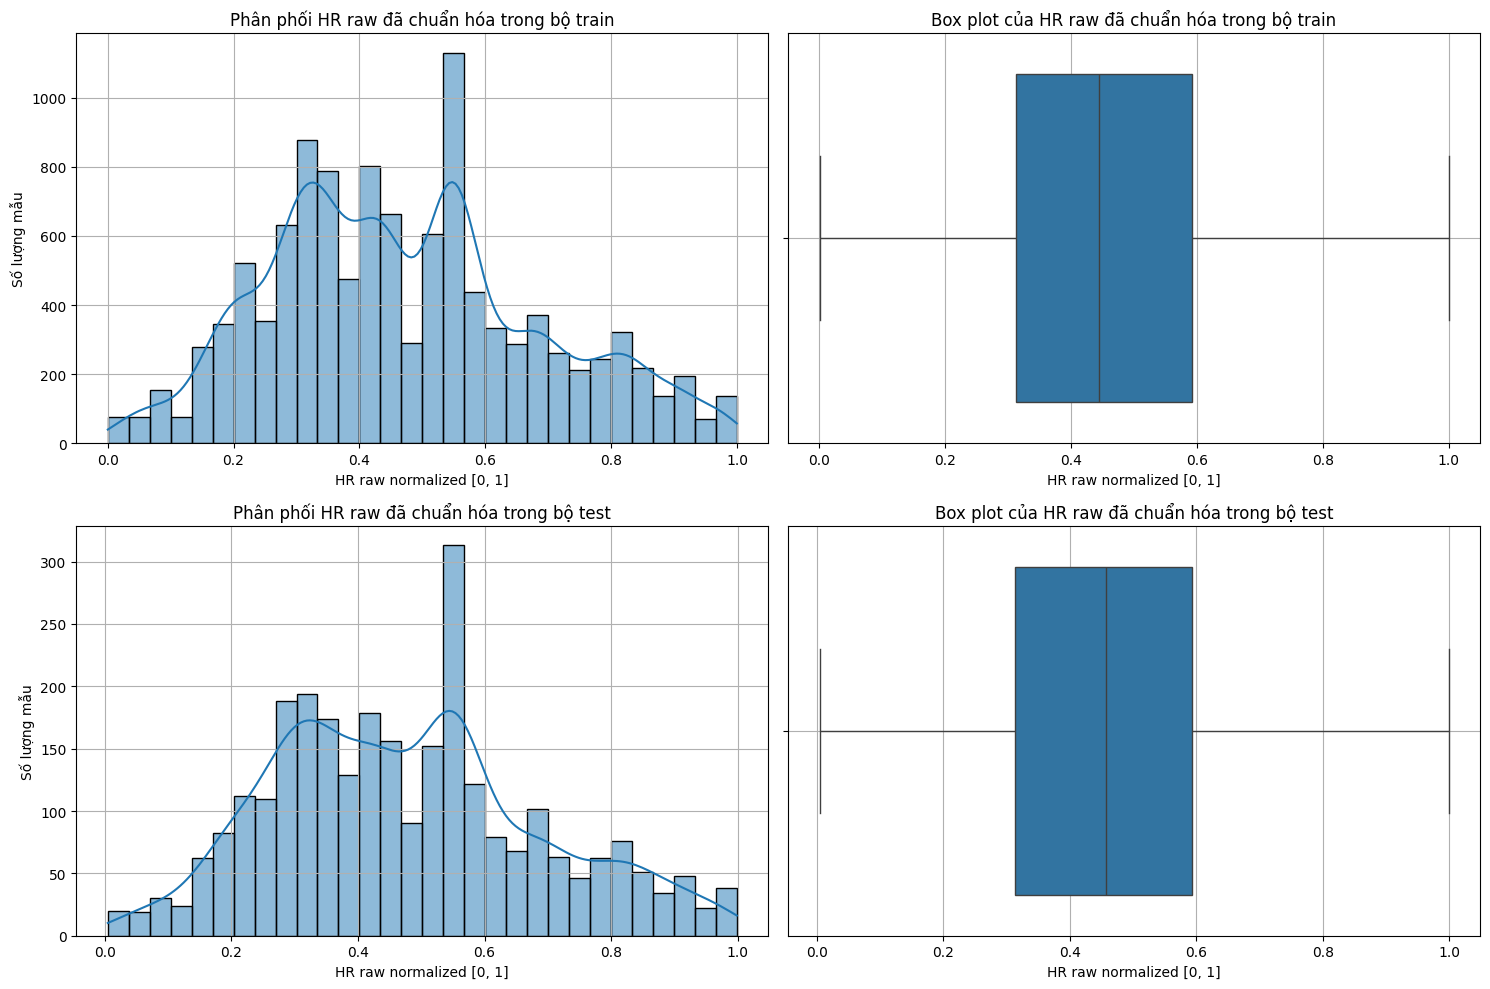

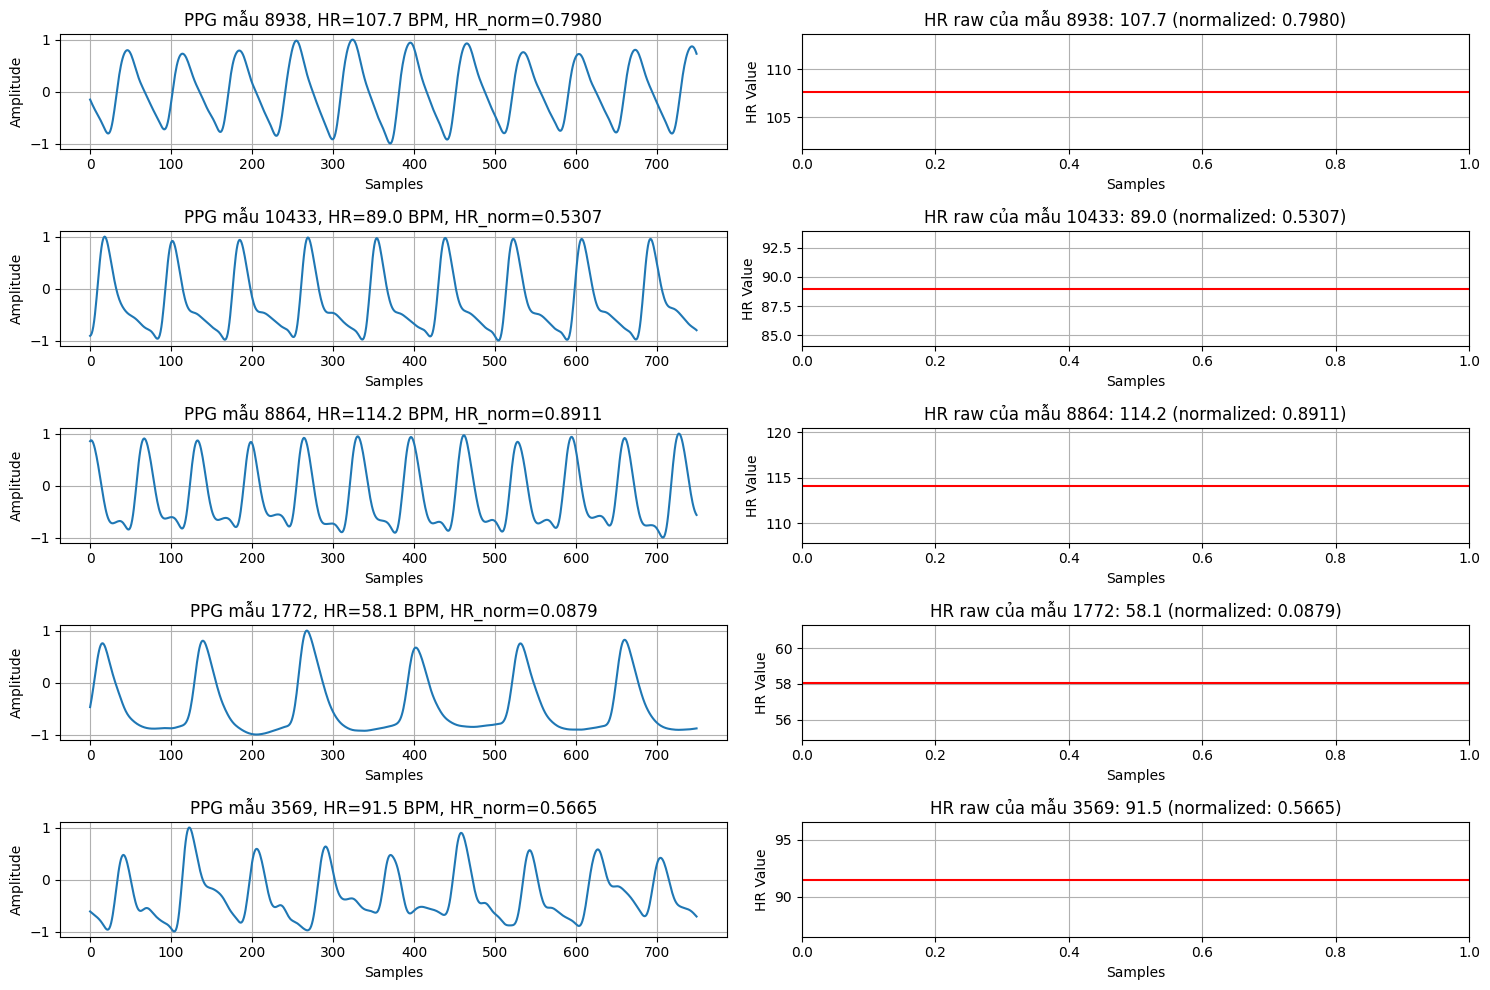

In [ ]:
# Trích xuất dữ liệu
X_train_loaded = loaded_data['X_train_norm']
X_test_loaded = loaded_data['X_test_norm']
hr_raw_train_loaded = loaded_data['hr_raw_train'].flatten()  # Flatten để chuyển từ (1, n) thành (n,)
hr_raw_test_loaded = loaded_data['hr_raw_test'].flatten()    # Flatten để chuyển từ (1, n) thành (n,)
X_total_loaded = loaded_data['X_total_norm']
hr_raw_total_loaded = loaded_data['hr_raw_total'].flatten()  # Flatten để chuyển từ (1, n) thành (n,)

# Kiểm tra kích thước dữ liệu đã load
print("\nShape của dữ liệu đã load:")
print(f"X_train_loaded shape: {X_train_loaded.shape}")
print(f"hr_raw_train_loaded shape: {hr_raw_train_loaded.shape}")
print(f"X_test_loaded shape: {X_test_loaded.shape}")
print(f"hr_raw_test_loaded shape: {hr_raw_test_loaded.shape}")
print(f"X_total_loaded shape: {X_total_loaded.shape}")
print(f"hr_raw_total_loaded shape: {hr_raw_total_loaded.shape}")

# Tính toán thống kê cho hr_raw_total_loaded
hr_raw_total_min = np.min(hr_raw_total_loaded)
hr_raw_total_max = np.max(hr_raw_total_loaded)
hr_raw_total_mean = np.mean(hr_raw_total_loaded)
hr_raw_total_std = np.std(hr_raw_total_loaded)

# In thống kê
print("\nThống kê HR raw total:")
print(f"Min: {hr_raw_total_min:.2f}, Max: {hr_raw_total_max:.2f}")
print(f"Mean: {hr_raw_total_mean:.2f}, Std: {hr_raw_total_std:.2f}")
print(f"Mean ± Std: {hr_raw_total_mean:.2f} ± {hr_raw_total_std:.2f}")

# Vẽ phân phối HR raw của bộ total
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(hr_raw_total_loaded, kde=True, bins=30)
plt.title('Phân phối HR raw trong bộ total')
plt.xlabel('HR raw values')
plt.ylabel('Số lượng mẫu')
plt.axvline(hr_raw_total_mean, color='r', linestyle='--', label=f'Mean: {hr_raw_total_mean:.2f}')
plt.axvline(hr_raw_total_mean - hr_raw_total_std, color='g', linestyle='--', label=f'Mean-SD: {hr_raw_total_mean - hr_raw_total_std:.2f}')
plt.axvline(hr_raw_total_mean + hr_raw_total_std, color='g', linestyle='--', label=f'Mean+SD: {hr_raw_total_mean + hr_raw_total_std:.2f}')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(x=hr_raw_total_loaded)
plt.title('Box plot của HR raw trong bộ total')
plt.xlabel('HR raw values')
plt.grid(True)

plt.tight_layout()
plt.show()

# Lọc dữ liệu nằm trong phạm vi mean ± 2*std của HR raw total
hr_raw_lower_bound = hr_raw_total_mean - 2 * hr_raw_total_std
hr_raw_upper_bound = hr_raw_total_mean + 2 * hr_raw_total_std

print(f"\nLọc dữ liệu trong khoảng HR raw: [{hr_raw_lower_bound:.2f}, {hr_raw_upper_bound:.2f}]")

# Tạo mask cho các mẫu nằm trong khoảng cho toàn bộ dữ liệu total
valid_mask_total = np.logical_and(
    hr_raw_total_loaded >= hr_raw_lower_bound,
    hr_raw_total_loaded <= hr_raw_upper_bound
)

# Lọc dữ liệu total
X_total_filtered = X_total_loaded[valid_mask_total]
hr_raw_total_filtered = hr_raw_total_loaded[valid_mask_total]

# Chuẩn hóa HR raw về khoảng [0, 1] dựa trên mean và std đã biết
hr_raw_mean = hr_raw_total_mean
hr_raw_std = hr_raw_total_std

# Hàm chuẩn hóa HR raw về khoảng [0, 1]
def normalize_hr_raw(hr_raw_data, mean=hr_raw_mean, std=hr_raw_std):
    # Sử dụng min-max normalization để scale về [0, 1]
    # Lấy giá trị min và max từ dữ liệu đã lọc
    hr_min = hr_raw_lower_bound  # Sử dụng giá trị biên dưới đã lọc
    hr_max = hr_raw_upper_bound  # Sử dụng giá trị biên trên đã lọc

    # Công thức chuẩn hóa min-max: (x - min) / (max - min)
    normalized = (hr_raw_data - hr_min) / (hr_max - hr_min)

    # Đảm bảo giá trị nằm trong khoảng [0, 1]
    normalized = np.clip(normalized, 0, 1)

    return normalized

# Áp dụng chuẩn hóa cho dữ liệu total đã lọc
hr_raw_total_normalized = normalize_hr_raw(hr_raw_total_filtered)

# Kiểm tra kết quả chuẩn hóa
print("\nThống kê HR raw total sau khi chuẩn hóa:")
print(f"Min: {np.min(hr_raw_total_normalized):.4f}, Max: {np.max(hr_raw_total_normalized):.4f}")
print(f"Mean: {np.mean(hr_raw_total_normalized):.4f}, Std: {np.std(hr_raw_total_normalized):.4f}")

# Vẽ phân phối HR raw sau khi chuẩn hóa
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(hr_raw_total_normalized, kde=True, bins=30)
plt.title('Phân phối HR raw đã chuẩn hóa trong bộ total')
plt.xlabel('HR raw normalized [0, 1]')
plt.ylabel('Số lượng mẫu')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(x=hr_raw_total_normalized)
plt.title('Box plot của HR raw đã chuẩn hóa trong bộ total')
plt.xlabel('HR raw normalized [0, 1]')
plt.grid(True)

plt.tight_layout()
plt.show()

# Chia lại thành tập train và test từ dữ liệu total đã lọc và chuẩn hóa
from sklearn.model_selection import train_test_split

# Sử dụng tỷ lệ 80% train, 20% test
X_train_filtered, X_test_filtered, hr_raw_train_normalized, hr_raw_test_normalized = train_test_split(
    X_total_filtered, hr_raw_total_normalized, test_size=0.2, random_state=42
)

# Lấy giá trị HR raw gốc tương ứng cho việc hiển thị - Sửa lỗi MemoryError
# Thay vì tạo bản sao mới, sử dụng lại indices từ lần split trước
train_indices = np.arange(len(X_total_filtered))
train_indices, test_indices = train_test_split(
    train_indices, test_size=0.2, random_state=42
)
hr_raw_train_filtered = hr_raw_total_filtered[train_indices]
hr_raw_test_filtered = hr_raw_total_filtered[test_indices]

# In thông tin về số lượng mẫu đã lọc
print(f"Số mẫu train ban đầu: {X_train_loaded.shape[0]}")
print(f"Số mẫu train sau khi lọc: {X_train_filtered.shape[0]}")
print(f"Tỷ lệ giữ lại (train): {X_train_filtered.shape[0]/X_train_loaded.shape[0]*100:.2f}%")

print(f"Số mẫu test ban đầu: {X_test_loaded.shape[0]}")
print(f"Số mẫu test sau khi lọc: {X_test_filtered.shape[0]}")
print(f"Tỷ lệ giữ lại (test): {X_test_filtered.shape[0]/X_test_loaded.shape[0]*100:.2f}%")

# Kiểm tra thống kê HR raw sau khi chia tập
print("\nThống kê HR raw sau khi chia tập:")
print(f"Train - Min: {np.min(hr_raw_train_normalized):.4f}, Max: {np.max(hr_raw_train_normalized):.4f}")
print(f"Train - Mean: {np.mean(hr_raw_train_normalized):.4f}, Std: {np.std(hr_raw_train_normalized):.4f}")
print(f"Test - Min: {np.min(hr_raw_test_normalized):.4f}, Max: {np.max(hr_raw_test_normalized):.4f}")
print(f"Test - Mean: {np.mean(hr_raw_test_normalized):.4f}, Std: {np.std(hr_raw_test_normalized):.4f}")

# Vẽ phân phối HR raw sau khi chia tập
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(hr_raw_train_normalized, kde=True, bins=30)
plt.title('Phân phối HR raw đã chuẩn hóa trong bộ train')
plt.xlabel('HR raw normalized [0, 1]')
plt.ylabel('Số lượng mẫu')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.boxplot(x=hr_raw_train_normalized)
plt.title('Box plot của HR raw đã chuẩn hóa trong bộ train')
plt.xlabel('HR raw normalized [0, 1]')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.histplot(hr_raw_test_normalized, kde=True, bins=30)
plt.title('Phân phối HR raw đã chuẩn hóa trong bộ test')
plt.xlabel('HR raw normalized [0, 1]')
plt.ylabel('Số lượng mẫu')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.boxplot(x=hr_raw_test_normalized)
plt.title('Box plot của HR raw đã chuẩn hóa trong bộ test')
plt.xlabel('HR raw normalized [0, 1]')
plt.grid(True)

plt.tight_layout()
plt.show()

# Vẽ một vài mẫu để double check
plt.figure(figsize=(15, 10))
for i in range(5):
    idx = np.random.randint(0, X_train_filtered.shape[0])

    # Vẽ tín hiệu PPG
    plt.subplot(5, 2, i*2+1)
    plt.plot(X_train_filtered[idx])
    plt.title(f'PPG mẫu {idx}, HR={hr_raw_train_filtered[idx]:.1f} BPM, HR_norm={hr_raw_train_normalized[idx]:.4f}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # Vẽ tín hiệu HR raw tương ứng
    plt.subplot(5, 2, i*2+2)
    plt.axhline(hr_raw_train_filtered[idx], color='r')
    plt.title(f'HR raw của mẫu {idx}: {hr_raw_train_filtered[idx]:.1f} (normalized: {hr_raw_train_normalized[idx]:.4f})')
    plt.xlabel('Samples')
    plt.ylabel('HR Value')
    plt.grid(True)

plt.tight_layout()
plt.show()



In [ ]:
# Thiết lập device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Sử dụng device: {device}")

# Chuyển đổi dữ liệu đã lọc và chuẩn hóa thành tensor
X_train_tensor = torch.FloatTensor(X_train_filtered)
hr_raw_train_tensor = torch.FloatTensor(hr_raw_train_normalized.reshape(-1, 1))  # Reshape để có shape (n, 1)

X_test_tensor = torch.FloatTensor(X_test_filtered)
hr_raw_test_tensor = torch.FloatTensor(hr_raw_test_normalized.reshape(-1, 1))  # Reshape để có shape (n, 1)

# Tạo dataset và dataloader
train_dataset = TensorDataset(X_train_tensor, hr_raw_train_tensor)
test_dataset = TensorDataset(X_test_tensor, hr_raw_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Sử dụng device: cpu


In [ ]:
import scipy.io as sio
data_to_save = {
    'X_train_filtered': X_train_filtered,
    'hr_raw_train_normalized': hr_raw_train_normalized,
    'X_test_filtered': X_test_filtered,
    'hr_raw_test_normalized': hr_raw_test_normalized
}
sio.savemat('final_combined_data.mat', data_to_save)
print("Đã lưu dữ liệu vào file final_combined_data.mat thành công!")

# Kiểm tra kích thước dữ liệu
print(f"X_train_filtered shape: {X_train_filtered.shape}")
print(f"hr_raw_train_normalized shape: {hr_raw_train_normalized.shape}")
print(f"X_test_filtered shape: {X_test_filtered.shape}")
print(f"hr_raw_test_normalized shape: {hr_raw_test_normalized.shape}")

# Kiểm tra kích thước dữ liệu trong dataloader
sample_data, sample_condition = next(iter(train_loader))
print(f"Batch data shape: {sample_data.shape}")
print(f"Batch condition shape: {sample_condition.shape}")

# Thiết lập các tham số cho mô hình dựa trên dữ liệu mới
input_size = X_train_filtered.shape[1]  # Kích thước của tín hiệu PPG từ dữ liệu đã load
condition_size = 1  # Kích thước của điều kiện (HR raw đã chuẩn hóa)
latent_dim = 64  # Kích thước không gian tiềm ẩn
hidden_dims = [256, 128, 64]  # Kích thước các lớp ẩn

print(f"Xây dựng mô hình với input_size={input_size}, condition_size={condition_size}")


Đã lưu dữ liệu vào file final_combined_data.mat thành công!
X_train_filtered shape: (11376, 750)
hr_raw_train_normalized shape: (11376,)
X_test_filtered shape: (2845, 750)
hr_raw_test_normalized shape: (2845,)
Batch data shape: torch.Size([64, 750])
Batch condition shape: torch.Size([64, 1])
Xây dựng mô hình với input_size=750, condition_size=1


In [ ]:

# Định nghĩa lớp Sampling
class Sampling(nn.Module):
    def __init__(self):
        super(Sampling, self).__init__()

    def forward(self, args):
        z_mean, z_log_var = args
        batch_size = z_mean.size(0)
        latent_dim = z_mean.size(1)

        # Reparameterization trick
        epsilon = torch.randn(batch_size, latent_dim).to(z_mean.device)
        return z_mean + torch.exp(0.5 * z_log_var) * epsilon

In [ ]:

# Encoder không có điều kiện
class Encoder(nn.Module):
    def __init__(self, input_size, latent_dim, hidden_dims):
        super(Encoder, self).__init__()
        layers = []
        in_dim = input_size
        for h_dim in hidden_dims:
            layers.append(nn.Linear(in_dim, h_dim))
            layers.append(nn.ReLU())
            in_dim = h_dim
        self.encoder = nn.Sequential(*layers)
        self.z_mean = nn.Linear(in_dim, latent_dim)
        self.z_log_var = nn.Linear(in_dim, latent_dim)

    def forward(self, x):
        h = self.encoder(x)
        z_mean = self.z_mean(h)
        z_log_var = self.z_log_var(h)
        std = torch.exp(0.5 * z_log_var)
        eps = torch.randn_like(std)
        z = z_mean + eps * std
        return z_mean, z_log_var, z


In [ ]:
# Decoder không có điều kiện
class Decoder(nn.Module):
    def __init__(self, latent_dim, output_size, hidden_dims):
        super(Decoder, self).__init__()
        layers = []
        in_dim = latent_dim
        for h_dim in hidden_dims:
            layers.append(nn.Linear(in_dim, h_dim))
            layers.append(nn.ReLU())
            in_dim = h_dim
        layers.append(nn.Linear(in_dim, output_size))
        self.decoder = nn.Sequential(*layers)

    def forward(self, z):
        return self.decoder(z)


In [ ]:
class VAE(nn.Module):
    def __init__(self, encoder, decoder):
        super(VAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x):
        z_mean, z_log_var, z = self.encoder(x)
        reconstruction = self.decoder(z)
        return reconstruction, z_mean, z_log_var


In [ ]:
vae_encoder = Encoder(input_size=input_size, latent_dim=latent_dim, hidden_dims=hidden_dims)
vae_decoder = Decoder(latent_dim=latent_dim, output_size=input_size, hidden_dims=hidden_dims[::-1])
vae = VAE(vae_encoder, vae_decoder)

vae.to(device)


VAE(
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=750, out_features=256, bias=True)
      (1): ReLU()
      (2): Linear(in_features=256, out_features=128, bias=True)
      (3): ReLU()
      (4): Linear(in_features=128, out_features=64, bias=True)
      (5): ReLU()
    )
    (z_mean): Linear(in_features=64, out_features=64, bias=True)
    (z_log_var): Linear(in_features=64, out_features=64, bias=True)
  )
  (decoder): Decoder(
    (decoder): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=128, bias=True)
      (3): ReLU()
      (4): Linear(in_features=128, out_features=256, bias=True)
      (5): ReLU()
      (6): Linear(in_features=256, out_features=750, bias=True)
    )
  )
)

In [ ]:
print("\n=== Cấu trúc VAE Encoder ===")
print(vae_encoder)
print("\n=== Cấu trúc VAE Decoder ===")
print(vae_decoder)
print("\n=== Cấu trúc VAE ===")
print(vae)
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nTổng số tham số của Encoder: {count_parameters(vae_encoder):,}")
print(f"Tổng số tham số của Decoder: {count_parameters(vae_decoder):,}")

print(f"\nTổng số tham số của VAE: {count_parameters(vae):,}")



=== Cấu trúc VAE Encoder ===
Encoder(
  (encoder): Sequential(
    (0): Linear(in_features=750, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
  )
  (z_mean): Linear(in_features=64, out_features=64, bias=True)
  (z_log_var): Linear(in_features=64, out_features=64, bias=True)
)

=== Cấu trúc VAE Decoder ===
Decoder(
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=750, bias=True)
  )
)

=== Cấu trúc VAE ===
VAE(
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=750, out_features=256, bias=True)
      (1): ReLU()
      (2): Linear(in_features=256, out_features

In [ ]:
# Định nghĩa hàm loss
def loss_function_fixed(x, x_recon, z_mean, z_log_var, kl_weight=0.5):
    """
    Hàm tính loss cho CVAE
    x: dữ liệu gốc
    x_recon: dữ liệu tái tạo
    z_mean: mean của phân phối latent
    z_log_var: log variance của phân phối latent
    kl_weight: trọng số cho KL divergence
    """
    # Reconstruction loss (MSE)
    recon_loss = F.mse_loss(x_recon, x, reduction='mean')

    # KL divergence
    kl_loss = -0.5 * torch.mean(1 + z_log_var - z_mean.pow(2) - z_log_var.exp())

    # Tổng loss
    loss = recon_loss + kl_weight * kl_loss

    return loss, recon_loss, kl_loss


In [ ]:
# Định nghĩa các tham số
latent_dim = 64
hidden_dims = [256, 128, 64]
learning_rate = 1e-3
batch_size = 64
epochs = 1000

# Kiểm tra CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Sử dụng thiết bị: {device}")

# Đảm bảo mô hình ở trên thiết bị đúng
vae = vae.to(device)

# Khởi tạo optimizer và scheduler
optimizer = torch.optim.Adam(vae.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=20, verbose=True)

# Khởi tạo danh sách để lưu lịch sử huấn luyện
train_losses = []
test_losses = []
recon_losses = []
kl_losses = []
best_loss = float('inf')

# Tham số cho early stopping
patience = 50
patience_counter = 0

# Tạo thư mục để lưu checkpoint
checkpoint_dir = 'checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)


Sử dụng thiết bị: cpu


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
# Vòng lặp huấn luyện
for epoch in range(epochs):
    # Train
    vae.train()
    total_train_loss = 0
    total_train_recon_loss = 0
    total_train_kl_loss = 0

    for batch_idx, (data, condition) in enumerate(train_loader):
        data = data.to(device)
        # Chuyển condition sang device
        hr_condition = condition.to(device)

        optimizer.zero_grad()

        # Forward pass
        z_mean, z_log_var, z = vae.encoder(data)
        x_recon = vae.decoder(z)

        # Tính loss
        loss, recon_loss, kl_loss = loss_function_fixed(data, x_recon, z_mean, z_log_var)

        # Backward và optimize
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item() * data.size(0)
        total_train_recon_loss += recon_loss.item() * data.size(0)
        total_train_kl_loss += kl_loss.item() * data.size(0)

    # Evaluate
    vae.eval()
    total_test_loss = 0
    total_test_recon_loss = 0
    total_test_kl_loss = 0

    with torch.no_grad():
        for data, condition in test_loader:
            data = data.to(device)
            hr_condition = condition.to(device)

            z_mean, z_log_var, z = vae.encoder(data)
            x_recon = vae.decoder(z)

            loss, recon_loss, kl_loss = loss_function_fixed(data, x_recon, z_mean, z_log_var)

            total_test_loss += loss.item() * data.size(0)
            total_test_recon_loss += recon_loss.item() * data.size(0)
            total_test_kl_loss += kl_loss.item() * data.size(0)

    # Tính trung bình loss
    train_loss = total_train_loss / len(train_loader.dataset)
    test_loss = total_test_loss / len(test_loader.dataset)
    train_recon_loss = total_train_recon_loss / len(train_loader.dataset)
    test_recon_loss = total_test_recon_loss / len(test_loader.dataset)
    train_kl_loss = total_train_kl_loss / len(train_loader.dataset)
    test_kl_loss = total_test_kl_loss / len(test_loader.dataset)

    # Scheduler step
    scheduler.step(test_loss)

    # Lưu losses
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    recon_losses.append(test_recon_loss)
    kl_losses.append(test_kl_loss)

    # In thông tin
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}")
        print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
        print(f"Recon Loss: {test_recon_loss:.4f}, KL Loss: {test_kl_loss:.4f}")

    # Lưu checkpoint
    if epoch % 50 == 0:
        checkpoint_path = os.path.join(checkpoint_dir, f'vae_checkpoint_epoch_{epoch}.pth')
        torch.save({
            'epoch': epoch,
            'model_state_dict': vae.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'train_loss': train_loss,
            'test_loss': test_loss,
            'train_losses': train_losses,
            'test_losses': test_losses,
            'recon_losses': recon_losses,
            'kl_losses': kl_losses
        }, checkpoint_path)

    # Lưu mô hình tốt nhất và kiểm tra early stopping
    if test_loss < best_loss:
        best_loss = test_loss
        best_model_path = 'best_vae_combined.pth'
        torch.save({
            'epoch': epoch,
            'model_state_dict': vae.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': train_loss,
            'test_loss': test_loss
        }, best_model_path)
        patience_counter = 0  # Reset counter khi có cải thiện
    else:
        patience_counter += 1  # Tăng counter khi không có cải thiện

    # Kiểm tra early stopping
    if patience_counter >= patience:
        print(f"Early stopping tại epoch {epoch} vì không có cải thiện sau {patience} epochs")
        break

# Lưu lịch sử huấn luyện
history = {
    'train_losses': train_losses,
    'test_losses': test_losses,
    'recon_losses': recon_losses,
    'kl_losses': kl_losses
}
torch.save(history, 'training_history_combined.pth')

print("Huấn luyện hoàn tất!")

Epoch 0/1000
Train Loss: 0.3441, Test Loss: 0.3391
Recon Loss: 0.3350, KL Loss: 0.0082
Epoch 10/1000
Train Loss: 0.1990, Test Loss: 0.1976
Recon Loss: 0.1517, KL Loss: 0.0919
Epoch 20/1000
Train Loss: 0.1540, Test Loss: 0.1574
Recon Loss: 0.1010, KL Loss: 0.1127
Epoch 30/1000
Train Loss: 0.1423, Test Loss: 0.1470
Recon Loss: 0.0886, KL Loss: 0.1168
Epoch 40/1000
Train Loss: 0.1375, Test Loss: 0.1411
Recon Loss: 0.0809, KL Loss: 0.1204
Epoch 50/1000
Train Loss: 0.1347, Test Loss: 0.1396
Recon Loss: 0.0796, KL Loss: 0.1199
Epoch 60/1000
Train Loss: 0.1326, Test Loss: 0.1368
Recon Loss: 0.0750, KL Loss: 0.1235
Epoch 70/1000
Train Loss: 0.1313, Test Loss: 0.1363
Recon Loss: 0.0743, KL Loss: 0.1239
Epoch 80/1000
Train Loss: 0.1301, Test Loss: 0.1354
Recon Loss: 0.0739, KL Loss: 0.1230
Epoch 90/1000
Train Loss: 0.1299, Test Loss: 0.1350
Recon Loss: 0.0726, KL Loss: 0.1247
Epoch 100/1000
Train Loss: 0.1293, Test Loss: 0.1337
Recon Loss: 0.0705, KL Loss: 0.1263
Epoch 110/1000
Train Loss: 0.128

In [ ]:
def denormalize_hr(normalized_hr, min_hr=51.94, max_hr=121.77):
    """
    Chuyển đổi từ HR chuẩn hóa về HR thực

    Args:
        normalized_hr: giá trị HR đã chuẩn hóa (0-1)
        min_hr: giá trị HR tối thiểu
        max_hr: giá trị HR tối đa

    Returns:
        actual_hr: giá trị HR thực
    """
    return normalized_hr * (max_hr - min_hr) + min_hr


In [ ]:
# Hàm đánh giá và tạo sinh PPG dựa trên điều kiện HR
def evaluate_generation(cvae, device):
    """
    Tạo sinh PPG dựa trên điều kiện HR

    Args:
        cvae: mô hình CVAE đã huấn luyện
        hr_value: giá trị HR đã được chuẩn hóa
        device: thiết bị tính toán (CPU/GPU)

    Returns:
        generated: tín hiệu PPG được tạo sinh
    """
    # Đảm bảo mô hình ở chế độ đánh giá
    cvae.eval()

    with torch.no_grad():
        # Chuẩn bị điều kiện HR

        # Tạo vector ngẫu nhiên từ phân phối chuẩn
        z = torch.randn(1, latent_dim).to(device)

        # Tạo sinh PPG từ decoder
        generated = cvae.decoder(z)

    return generated

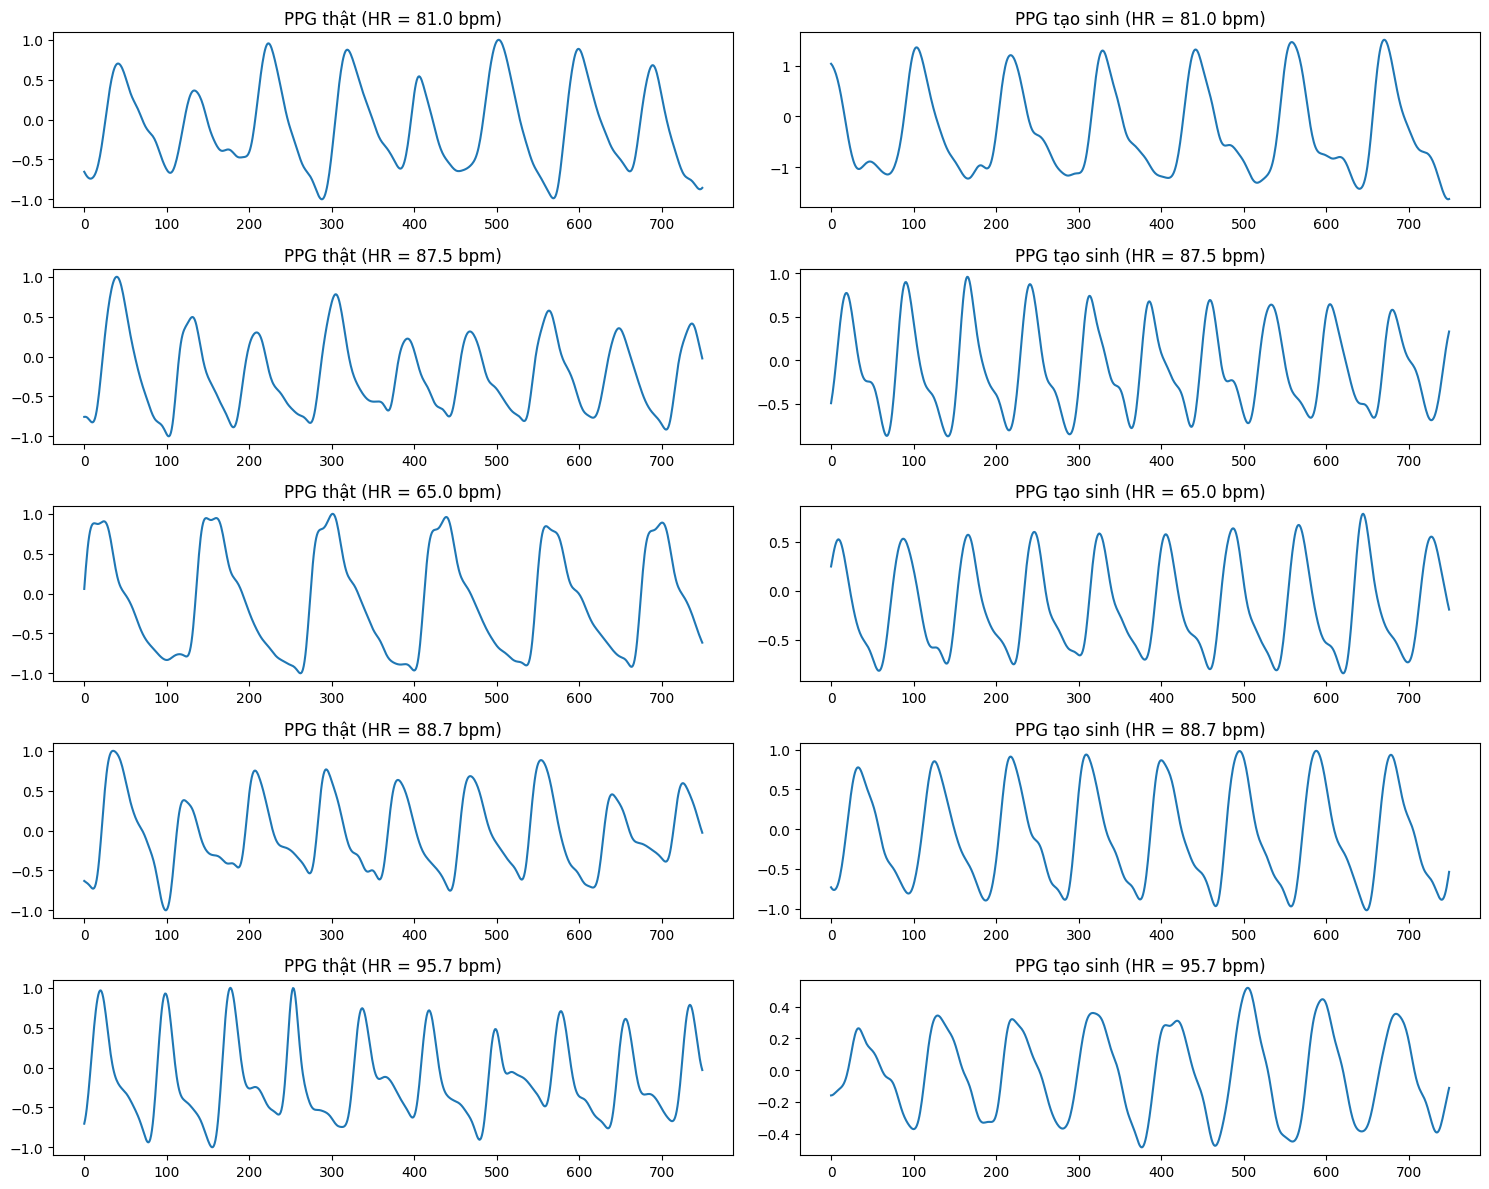

In [ ]:
# Lấy một số mẫu từ tập test để so sánh
n_samples = 5
test_samples = []
test_conditions = []

# Lấy một số mẫu từ tập test
for i, (data, condition) in enumerate(test_loader):
    if i >= n_samples:
        break
    test_samples.append(data[0])
    test_conditions.append(condition[0])

# Tạo sinh PPG với các điều kiện HR từ tập test
generated_samples = []
for hr_condition in test_conditions:
    generated = evaluate_generation(vae, device)
    generated_samples.append(generated.cpu().squeeze(0))

# Vẽ đồ thị so sánh giữa PPG thật và PPG tạo sinh
plt.figure(figsize=(15, 12))

for i in range(n_samples):
    # Chuyển đổi HR chuẩn hóa về HR thực
    actual_hr = denormalize_hr(test_conditions[i].item())

    # Vẽ PPG thật
    plt.subplot(n_samples, 2, 2*i+1)
    plt.plot(test_samples[i].cpu().numpy())
    plt.title(f'PPG thật (HR = {actual_hr:.1f} bpm)')

    # Vẽ PPG tạo sinh
    plt.subplot(n_samples, 2, 2*i+2)
    plt.plot(generated_samples[i].numpy())
    plt.title(f'PPG tạo sinh (HR = {actual_hr:.1f} bpm)')

plt.tight_layout()
plt.show()

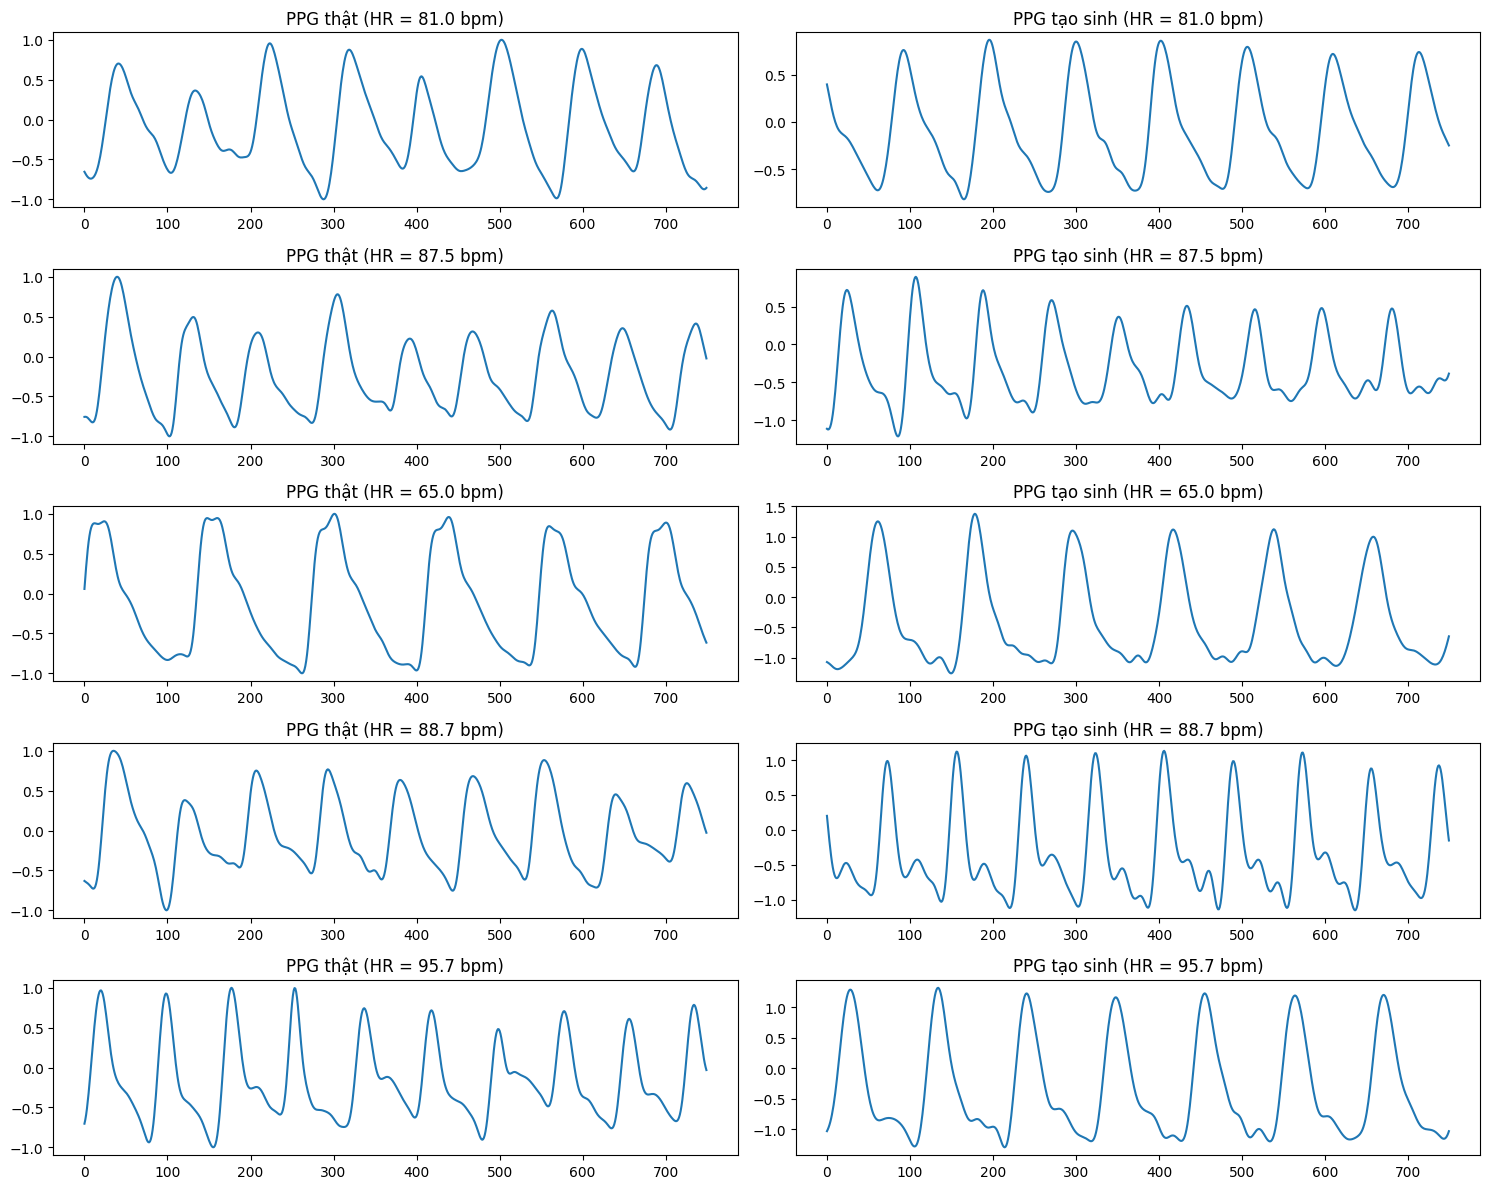

In [ ]:
# Lấy một số mẫu từ tập test để so sánh
n_samples = 5
test_samples = []
test_conditions = []

# Lấy một số mẫu từ tập test
for i, (data, condition) in enumerate(test_loader):
    if i >= n_samples:
        break
    test_samples.append(data[0])
    test_conditions.append(condition[0])

# Tạo sinh PPG với các điều kiện HR từ tập test
generated_samples = []
for hr_condition in test_conditions:
    generated = evaluate_generation(vae, device)
    generated_samples.append(generated.cpu().squeeze(0))

# Vẽ đồ thị so sánh giữa PPG thật và PPG tạo sinh
plt.figure(figsize=(15, 12))

for i in range(n_samples):
    # Chuyển đổi HR chuẩn hóa về HR thực
    actual_hr = denormalize_hr(test_conditions[i].item())

    # Vẽ PPG thật
    plt.subplot(n_samples, 2, 2*i+1)
    plt.plot(test_samples[i].cpu().numpy())
    plt.title(f'PPG thật (HR = {actual_hr:.1f} bpm)')

    # Vẽ PPG tạo sinh
    plt.subplot(n_samples, 2, 2*i+2)
    plt.plot(generated_samples[i].numpy())
    plt.title(f'PPG tạo sinh (HR = {actual_hr:.1f} bpm)')

plt.tight_layout()
plt.show()

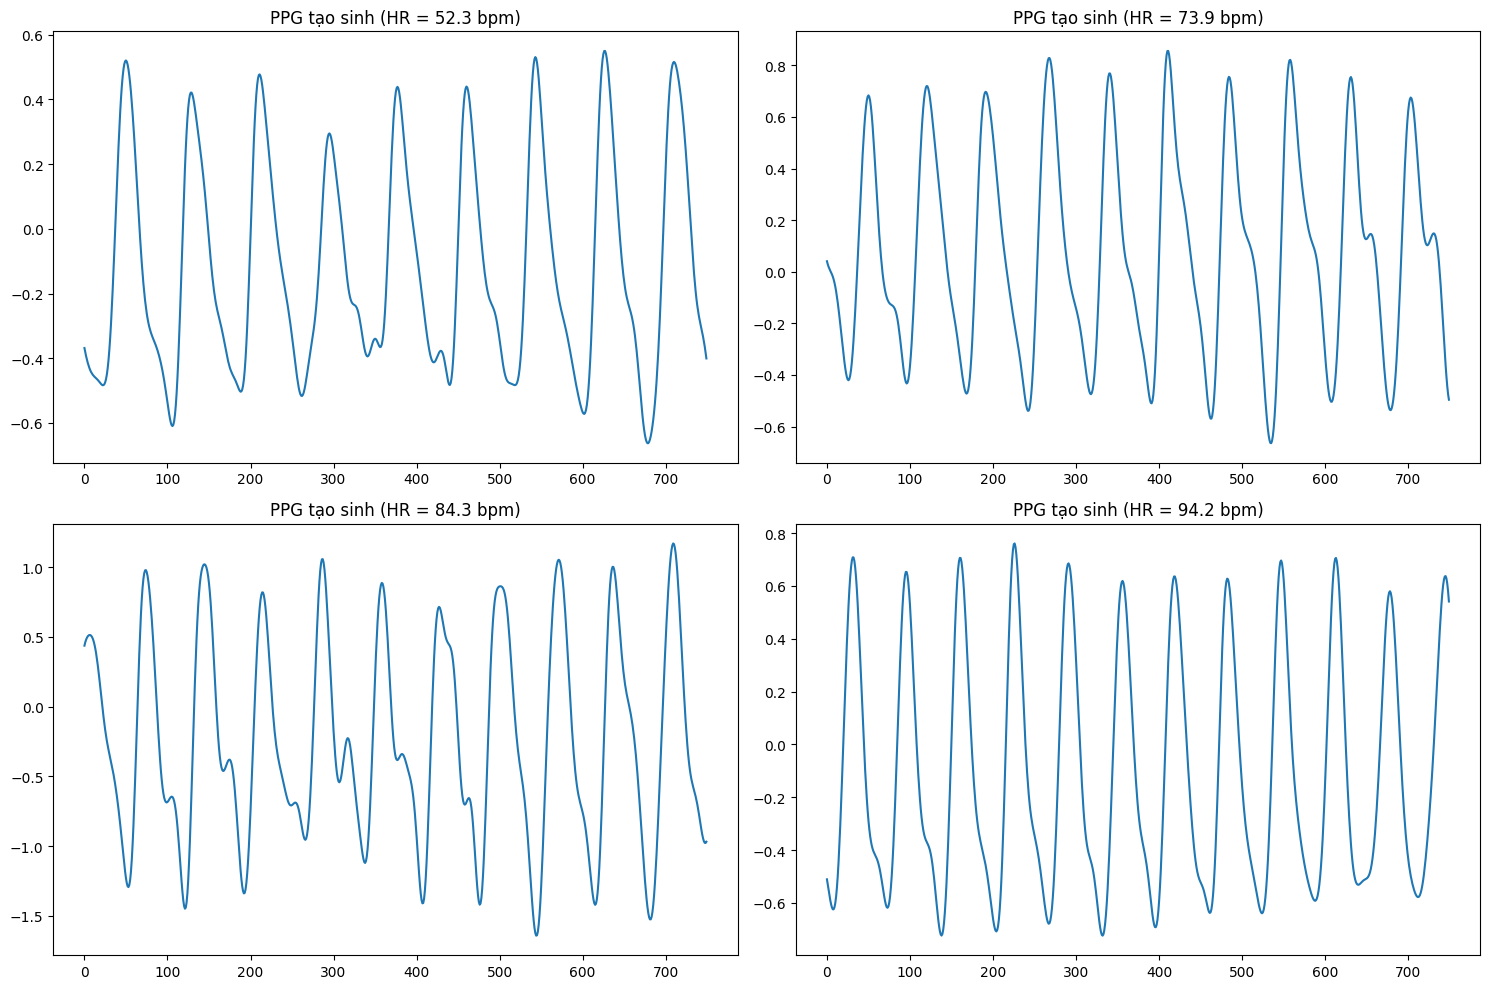

In [ ]:
# Tạo sinh PPG với các giá trị HR khác nhau từ tập test
# Lấy thêm mẫu từ tập test để có nhiều HR khác nhau
test_hrs = []
for i, (_, condition) in enumerate(test_loader):
    if i >= 20:  # Lấy 20 mẫu để chọn ra các HR đa dạng
        break
    for hr in condition:
        test_hrs.append(hr.item())

# Chọn 4 giá trị HR đa dạng từ tập test
test_hrs = sorted(test_hrs)
selected_indices = [int(len(test_hrs) * i / 4) for i in range(4)]
selected_hrs = [test_hrs[i] for i in selected_indices]

generated_hr_samples = []
for hr in selected_hrs:
    hr_tensor = torch.tensor([hr], dtype=torch.float32)
    generated = evaluate_generation(vae, device)
    generated_hr_samples.append(generated.cpu().squeeze(0))

# Vẽ đồ thị PPG tạo sinh với các giá trị HR khác nhau từ tập test
plt.figure(figsize=(15, 10))

for i, hr in enumerate(selected_hrs):
    # Chuyển đổi HR chuẩn hóa về HR thực
    actual_hr = denormalize_hr(hr)

    plt.subplot(2, 2, i+1)
    plt.plot(generated_hr_samples[i].numpy())
    plt.title(f'PPG tạo sinh (HR = {actual_hr:.1f} bpm)')

plt.tight_layout()
plt.show()

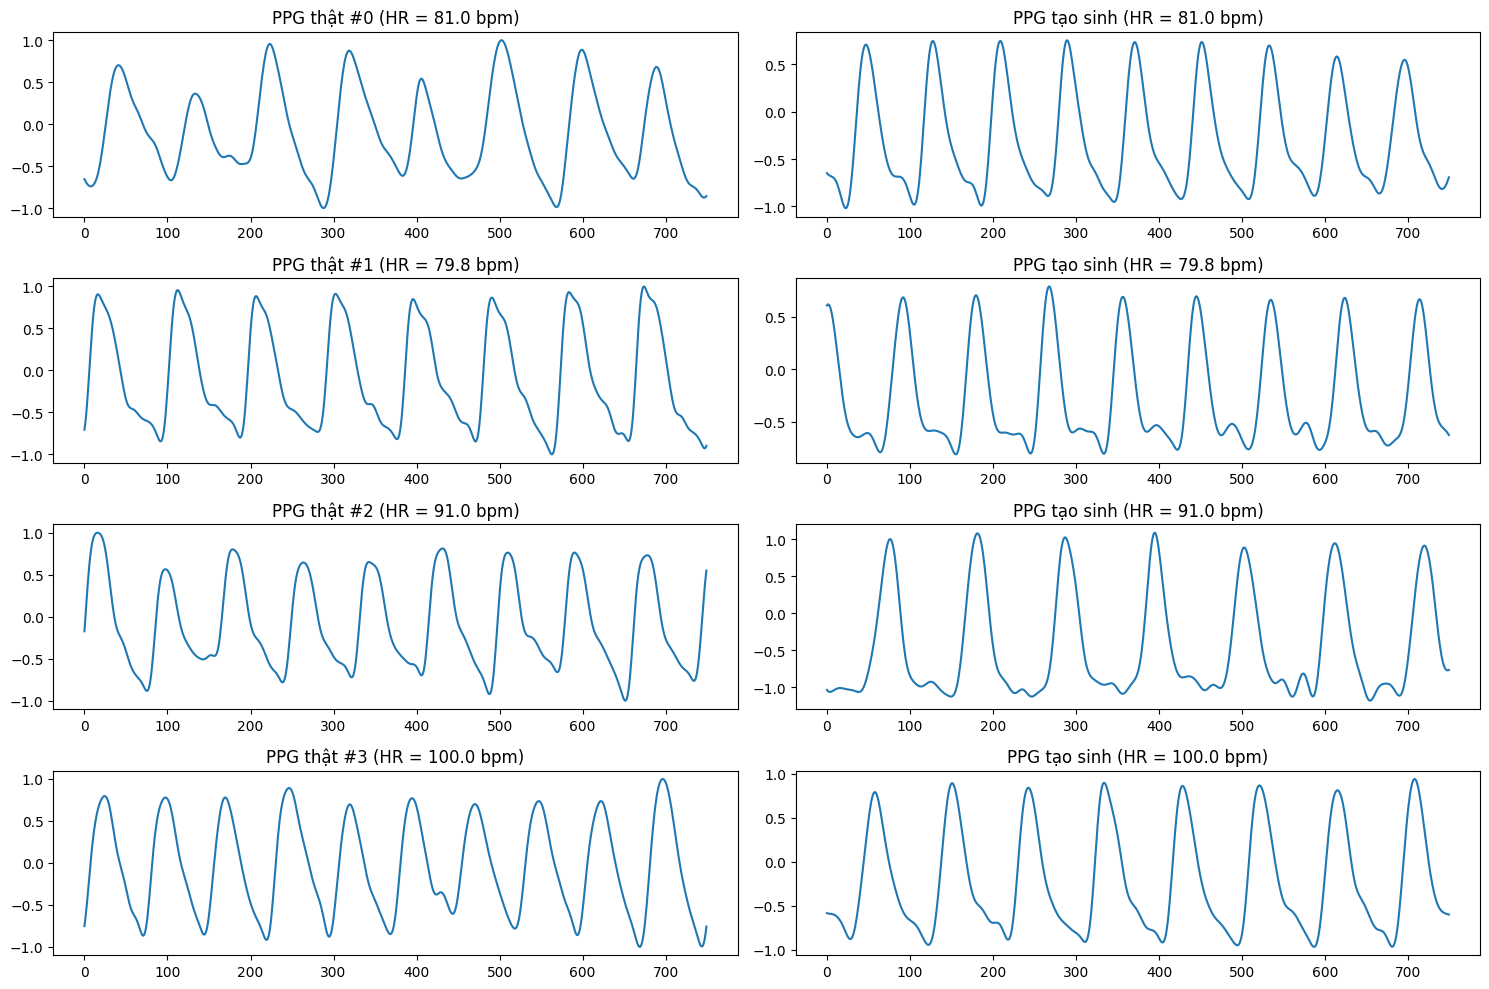

In [ ]:
# So sánh nhiều mẫu PPG thật và tạo sinh với cùng HR
plt.figure(figsize=(15, 10))

# Chọn 4 mẫu khác nhau từ tập test
selected_samples = []
selected_conditions = []
selected_indices = []

# Tìm các mẫu với HR khác nhau
unique_hrs = {}
for i, (data, condition) in enumerate(test_loader):
    if len(unique_hrs) >= 4:
        break
    for j, hr in enumerate(condition):
        hr_val = hr.item()
        hr_actual = denormalize_hr(hr_val)
        hr_rounded = round(hr_actual)

        if hr_rounded not in unique_hrs and len(unique_hrs) < 4:
            unique_hrs[hr_rounded] = (data[j], hr_val, i*len(condition)+j)
            selected_samples.append(data[j])
            selected_conditions.append(hr_val)
            selected_indices.append(i*len(condition)+j)

# Tạo sinh PPG với các điều kiện HR đã chọn
generated_selected = []
for hr in selected_conditions:
    hr_tensor = torch.tensor([hr], dtype=torch.float32)
    generated = evaluate_generation(vae, device)
    generated_selected.append(generated.cpu().squeeze(0))

# Vẽ đồ thị so sánh
for i in range(len(selected_samples)):
    actual_hr = denormalize_hr(selected_conditions[i])

    plt.subplot(4, 2, 2*i+1)
    plt.plot(selected_samples[i].cpu().numpy())
    plt.title(f'PPG thật #{selected_indices[i]} (HR = {actual_hr:.1f} bpm)')

    plt.subplot(4, 2, 2*i+2)
    plt.plot(generated_selected[i].numpy())
    plt.title(f'PPG tạo sinh (HR = {actual_hr:.1f} bpm)')

plt.tight_layout()
plt.show()
